<h1> Geometric Operations and Other Mathematical Tools</h1>


Estimated time needed: **40** minutes


<h2>Objectives</h2>


In the first part of the lab, you will apply geometric transformations to an image. This allows you to perform different operations like reshape translation, i.e. to shift, reshape and rotate the image. In the second part of the lab, you will learn how to apply some basic array and matrix operations to the image. 


<ul>
    <li><a href='#PT'> Geometric Operations  </a>
        <ul>
            <li>Scaling</li>
            <li>Translation</li>
            <li>Rotation</li>   
          </ul>
        <li><a href='#PT'>  Mathematical Operations   </a>
        <ul>
            <li>Array Operations  </li>
            <li>Matix Operations n</li> 
          </ul>


</ul>


----


Download the image for the lab:


In [ ]:
!curl "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png" -O lenna.png
!curl "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png" -O baboon.png
!curl "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png" -O barbara.png  

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  3  462k    3 15561    0     0   6352      0  0:01:14  0:00:02  0:01:12  6361
 13  462k   13 65536    0     0  19385      0  0:00:24  0:00:03  0:00:21 19406
 31  462k   31  144k    0     0  34196      0  0:00:13  0:00:04  0:00:09 34220
 44  462k   44  207k    0     0  39974      0  0:00:11  0:00:05  0:00:06 42355
 58  462k   58  272k    0     0  41902      0  0:00:11  0:00:06  0:00:05 53347
 62  462k   62  288k    0     0  39476      0  0:00:12  0:00:07  0:00:05 55636
 72  462k   72  336k    0     0  40998      0  0:00:11  0:00:08  0:00:03 55583
 93  462k   93  431k    0     0  46948      0  0:00

We will be using the following imported functions in this lab:


In [ ]:
import matplotlib.pyplot as plt  # thư viện để vẽ biểu đồ và hiển thị ảnh
from PIL import Image  # thư viện xử lý ảnh của python
import numpy as np  # thư viện tính toán số học với mảng đa chiều

First, let's define a helper function to plot two images side-by-side. You will not need to understand this code this moment, but this function will be used repeatedly in this tutorial to showcase the results. 


In [ ]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):  # định nghĩa hàm để hiển thị hai ảnh cạnh nhau
    plt.figure(figsize=(10,10))  # tạo khung hình với kích thước 10x10 inch
    plt.subplot(1, 2, 1)  # chia khung thành 1 hàng 2 cột và chọn ô đầu tiên
    plt.imshow(image_1,cmap="gray")  # hiển thị ảnh đầu tiên với bảng màu xám
    plt.title(title_1)  # đặt tiêu đề cho ảnh đầu tiên
    plt.subplot(1, 2, 2)  # chọn ô thứ hai trong khung đã chia
    plt.imshow(image_2,cmap="gray")  # hiển thị ảnh thứ hai với bảng màu xám
    plt.title(title_2)  # đặt tiêu đề cho ảnh thứ hai
    plt.show()  # hiển thị toàn bộ khung hình ra màn hình

#  Geometric Transformations


 Geometric transformations allow you to perform different operations like translation, i.e. to shift, reshape and rotate the image.


We can resize an image using the method  <code>resize()</code> of <code>PIL</code> images, which takes the resized image's <code>width</code> and <code>height</code> as paramters. 

Consider the following image:


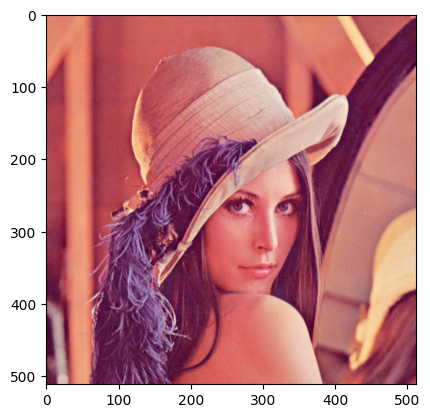

In [ ]:
image = Image.open("lenna.png")  # mở file ảnh lenna.png và lưu vào biến image
plt.imshow(image)  # hiển thị ảnh bằng matplotlib
plt.show()  # vẽ ảnh ra màn hình

We can scale the horizontal axis by two and leave the vertical axis as is:


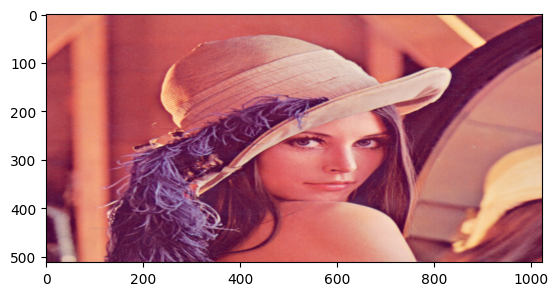

In [ ]:
width, height = image.size  # lấy chiều rộng và chiều cao của ảnh gốc
new_width = 2 * width  # tính chiều rộng mới bằng cách nhân đôi chiều rộng cũ
new_hight = height  # giữ nguyên chiều cao như ảnh gốc
new_image = image.resize((new_width, new_hight))  # thay đổi kích thước ảnh theo chiều rộng và chiều cao mới
plt.imshow(new_image)  # hiển thị ảnh đã được thay đổi kích thước
plt.show()  # vẽ ảnh ra màn hình

In the same manner, we can scale the vertical axis by two:


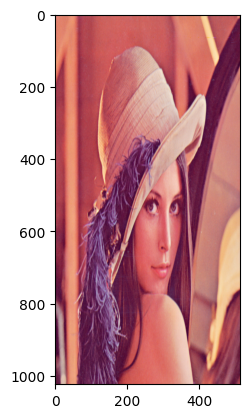

In [ ]:
new_width = width  # giữ nguyên chiều rộng như ảnh gốc
new_hight = 2 * height  # tính chiều cao mới bằng cách nhân đôi chiều cao cũ
new_image = image.resize((new_width, new_hight))  # thay đổi kích thước ảnh theo chiều rộng và chiều cao mới
plt.imshow(new_image)  # hiển thị ảnh đã được thay đổi kích thước
plt.show()  # vẽ ảnh ra màn hình

We can double both the width and the height of the image:


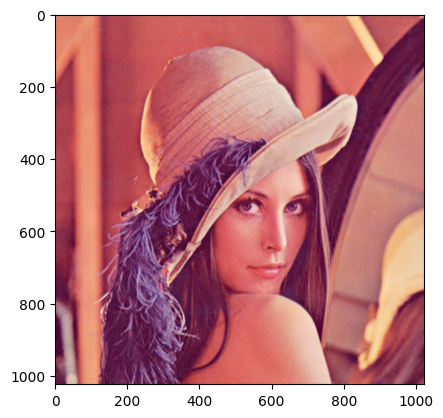

In [ ]:
new_width = 2 * width  # tính chiều rộng mới bằng cách nhân đôi chiều rộng cũ
new_hight = 2 * height  # tính chiều cao mới bằng cách nhân đôi chiều cao cũ
new_image = image.resize((new_width, new_hight))  # thay đổi kích thước ảnh với cả chiều rộng và chiều cao đều tăng gấp đôi
plt.imshow(new_image)  # hiển thị ảnh đã được thay đổi kích thước
plt.show()  # vẽ ảnh ra màn hình

We can also shrink the image's width and height both by 1/2:


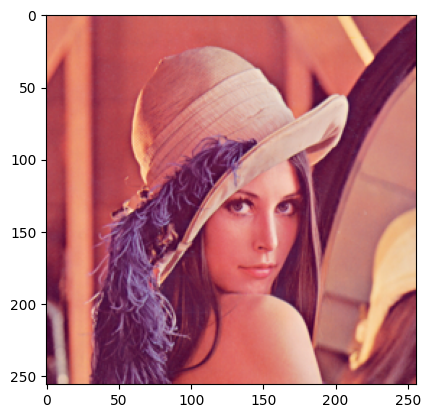

In [ ]:
new_width = width // 2  # tính chiều rộng mới bằng cách chia đôi chiều rộng cũ và làm tròn xuống
new_hight = height // 2  # tính chiều cao mới bằng cách chia đôi chiều cao cũ và làm tròn xuống

new_image = image.resize((new_width, new_hight))  # thay đổi kích thước ảnh với cả chiều rộng và chiều cao đều giảm một nửa
plt.imshow(new_image)  # hiển thị ảnh đã được thu nhỏ
plt.show()  # vẽ ảnh ra màn hình

## Rotation 


We can rotate an image by angle $\theta$, using the method `rotate`.


We can rotate our toy image by 45 degrees:


In [ ]:
theta = 45  # đặt góc quay là 45 độ
new_image = image.rotate(theta)  # xoay ảnh theo góc theta đã định nghĩa

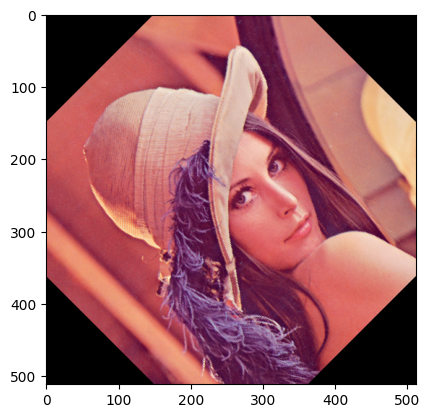

In [ ]:
plt.imshow(new_image)  # hiển thị ảnh đã được xoay
plt.show()  # vẽ ảnh ra màn hình

# Mathematical Operations 


## Array Operations 


We can perform array operations on an image; Using Python broadcasting, we can add a constant to each pixel's intensity value. 

Before doing that, we must first we convert the PIL image to a numpy array.


In [ ]:
image = np.array(image)  # chuyển đổi ảnh từ định dạng PIL sang mảng numpy để có thể thực hiện các phép toán

We can then add the constant to the image array:


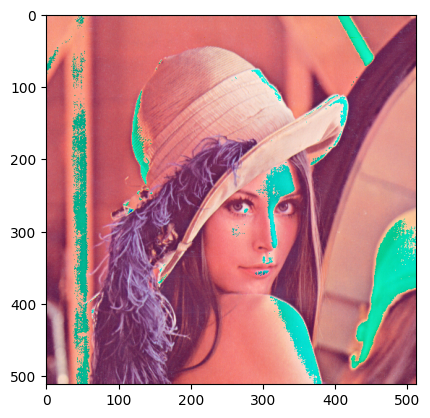

In [ ]:
new_image = image + 20  # cộng thêm 20 vào giá trị cường độ của mỗi điểm ảnh để làm sáng ảnh
plt.imshow(new_image)  # hiển thị ảnh đã được làm sáng
plt.show()  # vẽ ảnh ra màn hình

We can also multiply every pixel's intensity value by a constant value.


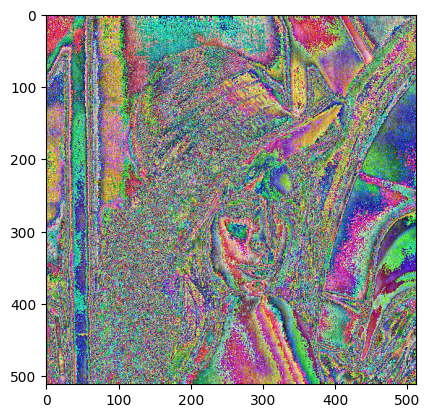

In [ ]:
new_image = 10 * image  # nhân giá trị cường độ của mỗi điểm ảnh với 10 để tăng độ sáng mạnh hơn
plt.imshow(new_image)  # hiển thị ảnh đã được nhân với hệ số
plt.show()  # vẽ ảnh ra màn hình

We can add the elements of two arrays of equal shape. In this example, we generate an array of random noises with the same shape and data type as our image.


In [ ]:
Noise = np.random.normal(0, 20, (height, width, 3)).astype(np.uint8)  # tạo mảng nhiễu ngẫu nhiên với phân phối chuẩn trung bình 0 độ lệch chuẩn 20 và cùng kích thước với ảnh rồi chuyển sang kiểu uint8
Noise.shape  # kiểm tra kích thước của mảng nhiễu vừa tạo

(512, 512, 3)

We add the generated noise to the image and plot the result. We see the values that have corrupted the image:


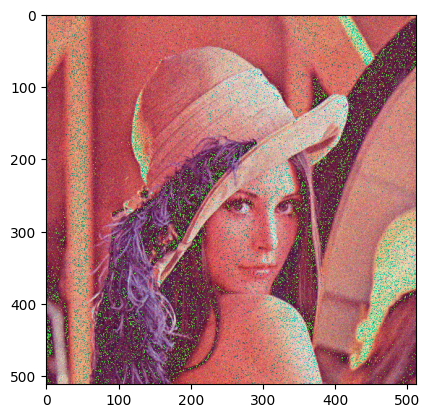

In [ ]:
new_image = image + Noise  # cộng mảng nhiễu vào ảnh gốc để tạo hiệu ứng nhiễu

plt.imshow(new_image)  # hiển thị ảnh đã bị thêm nhiễu
plt.show()  # vẽ ảnh ra màn hình

At the same time, we can multiply the elements of two arrays of equal shape. We can multiply the random image and the Lenna image and plot the result. 


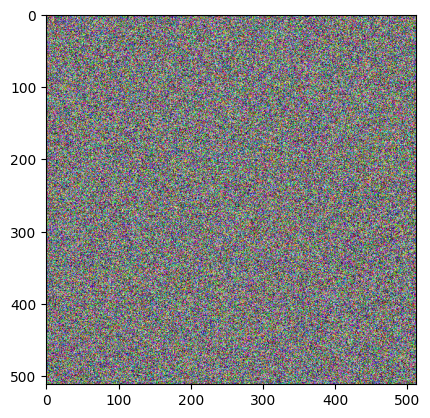

In [ ]:
new_image = image*Noise  # nhân từng phần tử của ảnh với từng phần tử tương ứng của mảng nhiễu

plt.imshow(new_image)  # hiển thị ảnh đã được nhân với nhiễu
plt.show()  # vẽ ảnh ra màn hình

## Matrix Operations 


Grayscale images are matrices. Consider the following grayscale image:


In [ ]:
im_gray = Image.open("barbara.png")  # mở file ảnh barbara.png và lưu vào biến im_gray

Even though the image is gray, it has three channels; we can convert it to a one-channel image.


In [ ]:
from PIL import ImageOps  # import module ImageOps từ thư viện PIL để có các hàm xử lý ảnh bổ sung như chuyển sang ảnh xám

In [ ]:
im_gray = ImageOps.grayscale(im_gray)  # chuyển đổi ảnh sang ảnh xám một kênh màu

We can convert the PIL image to a numpy array:


In [ ]:
im_gray = np.array(im_gray )  # chuyển đổi ảnh xám từ định dạng PIL sang mảng numpy để thực hiện các phép toán ma trận

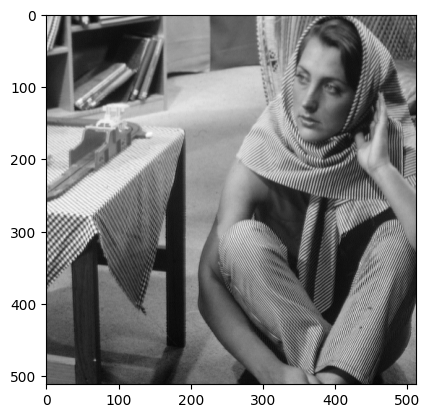

In [ ]:
plt.imshow(im_gray, cmap='gray')  # hiển thị ảnh xám với bảng màu xám
plt.show()  # vẽ ảnh ra màn hình

We can apply algorithms designed for matrices.  We can use  Singular Value Decomposition, decomposing our image matrix into  a product of three matrices.


In [ ]:
U, s, V = np.linalg.svd(im_gray, full_matrices=True)  # phân tích svd để tách ma trận ảnh thành ba ma trận U s và V với full_matrices cho phép tạo ma trận đầy đủ

We see <code>s</code> is not rectangular:


In [ ]:
s.shape  # kiểm tra kích thước của vector s chứa các giá trị đặc trưng

(512,)

We can convert  <code>s</code> to a diagonal matrix <code>S</code>:


In [ ]:
S = np.zeros((im_gray.shape[0], im_gray.shape[1]))  # tạo ma trận S toàn số không với cùng kích thước như ảnh xám
S[:im_gray.shape[0], :im_gray.shape[0]] = np.diag(s)  # đặt các giá trị đường chéo từ vector s vào ma trận S để tạo ma trận đường chéo

We can plot the matrix U and V:


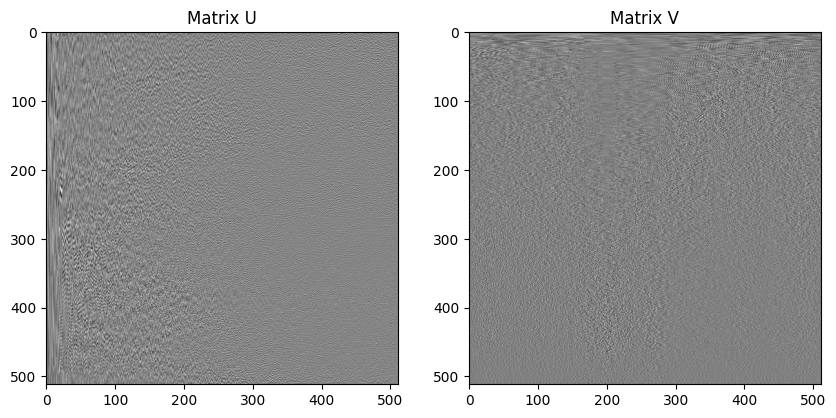

In [ ]:
plot_image(U, V, title_1="Matrix U", title_2="Matrix V")  # hiển thị hai ma trận U và V cạnh nhau bằng hàm plot_image đã định nghĩa

We see most of the elements in S are zero:


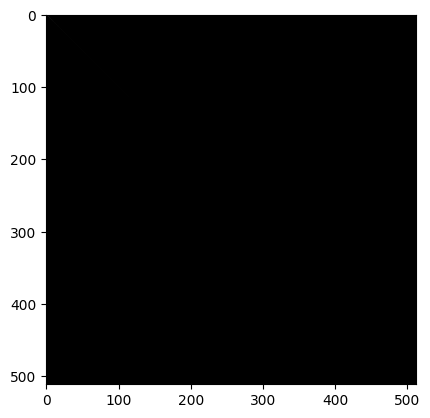

In [ ]:
plt.imshow(S, cmap='gray')  # hiển thị ma trận S với bảng màu xám để xem các giá trị đường chéo
plt.show()  # vẽ ma trận ra màn hình

We can find the matrix product of all the  matrices. First, we can perform matrix multiplication on S and U and assign it to `B` and plot the results: 


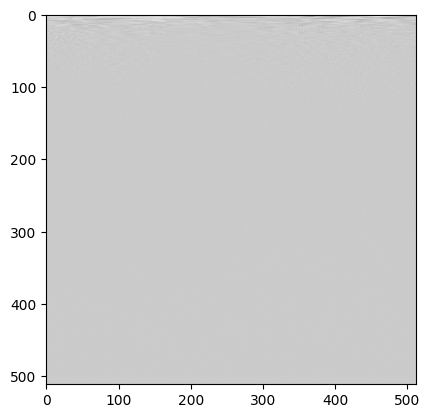

In [ ]:
B = S.dot(V)  # nhân ma trận S với ma trận V để tạo ma trận trung gian B
plt.imshow(B, cmap='gray')  # hiển thị kết quả ma trận B với bảng màu xám
plt.show()  # vẽ ma trận B ra màn hình

We can find the matrix product of `U`, `S`, and `B`. We see it's the entire image:


In [ ]:
A = U.dot(B)  # nhân ma trận U với ma trận B để khôi phục lại ảnh gốc từ các thành phần đã phân tích

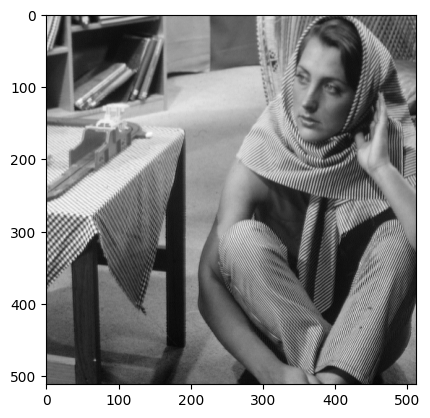

In [ ]:
plt.imshow(A, cmap='gray')  # hiển thị ảnh đã được khôi phục từ các ma trận phân tích
plt.show()  # vẽ ảnh khôi phục ra màn hình

It turns out that many elements are redundant. We can eliminate some rows and columns of S and V and approximate the image by finding the product:


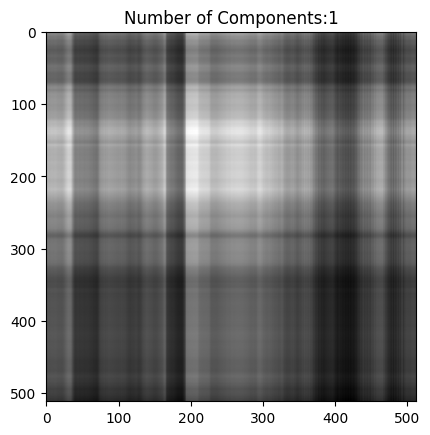

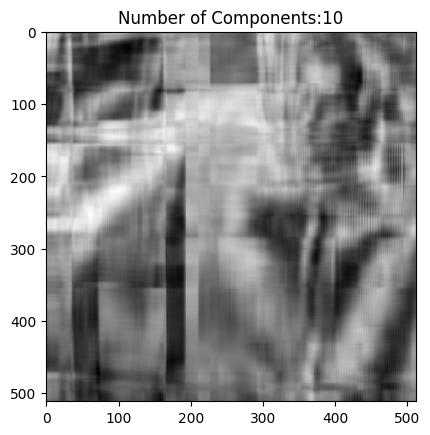

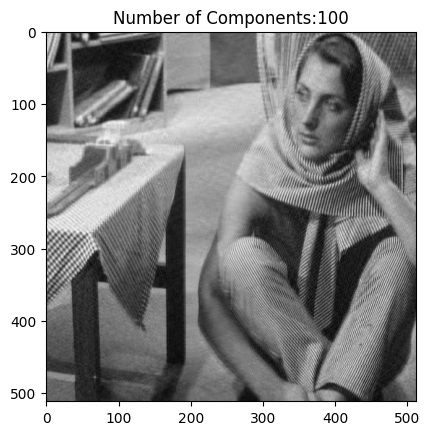

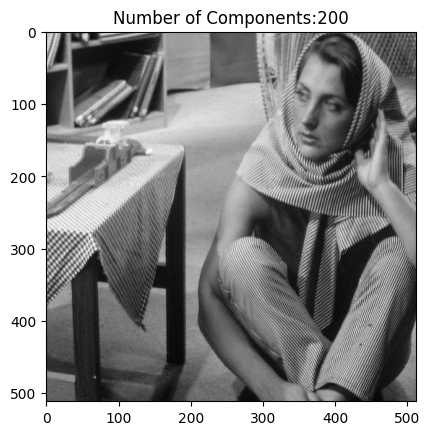

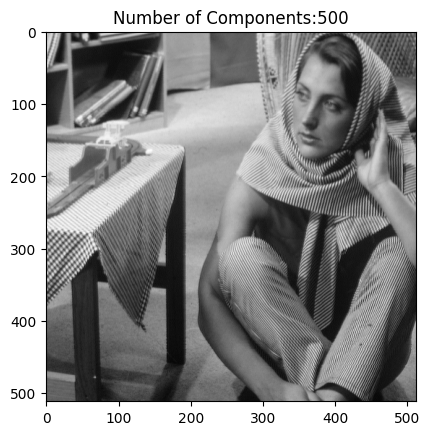

In [ ]:
for n_component in [1, 10, 100, 200, 500]:  # lặp qua các số thành phần khác nhau để xem chất lượng ảnh khi giảm số thành phần
    S_new = S[:, :n_component]  # lấy n_component cột đầu tiên của ma trận S để giảm số thành phần
    V_new = V[:n_component, :]  # lấy n_component hàng đầu tiên của ma trận V để giảm số thành phần
    A = U.dot(S_new.dot(V_new))  # nhân lại ba ma trận để tạo ảnh xấp xỉ với số thành phần đã giảm
    plt.imshow(A, cmap='gray')  # hiển thị ảnh xấp xỉ với bảng màu xám
    plt.title("Number of Components:" + str(n_component))  # đặt tiêu đề cho ảnh với số thành phần đang sử dụng
    plt.show()  # vẽ ảnh xấp xỉ ra màn hình

We see we only need 100 to 200 Components to represent the image.


# References 


[1]  Images were taken from: https://homepages.cae.wisc.edu/~ece533/images/
    
[2]  <a href='https://pillow.readthedocs.io/en/stable/index.html'>Pillow Docs</a>

[3]  <a href='https://opencv.org/'>Open CV</a>

[4] Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).

[5 ] Jian, Wushuai, Xueyan Sun, and Shuqian Luo. "Computer-aided diagnosis of breast microcalcifications based on dual-tree complex wavelet transform." Biomedical engineering online 11.1 (2012): 1-12.


<!--<h2>Change Log</h2>-->


<!--<table>
    <tr>
        <th>Date (YYYY-MM-DD)</th>
        <th>Version</th>
        <th>Changed By</th>
        <th>Change Description</th>
    </tr>
    <tr>
        <td>2020-07-20</td>
        <td>0.2</td>
        <td>Azim</td>
        <td>Modified Multiple Areas</td>
    </tr>
    <tr>
        <td>2020-07-17</td>
        <td>0.1</td>
        <td>Azim</td>
        <td>Created Lab Template</td>
    </tr>
</table>
-->


<h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>
